In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#add libraries and graph settings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.random.seed(24)

# add csv to be processed
# data_file = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv') 
data_file = pd.read_csv('diabetes.csv')
data_file

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1. Initial Data Observations

In [4]:
# Take a look at the data structure
data_file.info()
data_file.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


No null values, but some measurements are clearly missing. For example, data from column 1,2,3,5, and 7 should not be 0. 

About the pedigree function: It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient.

In [5]:
data_file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


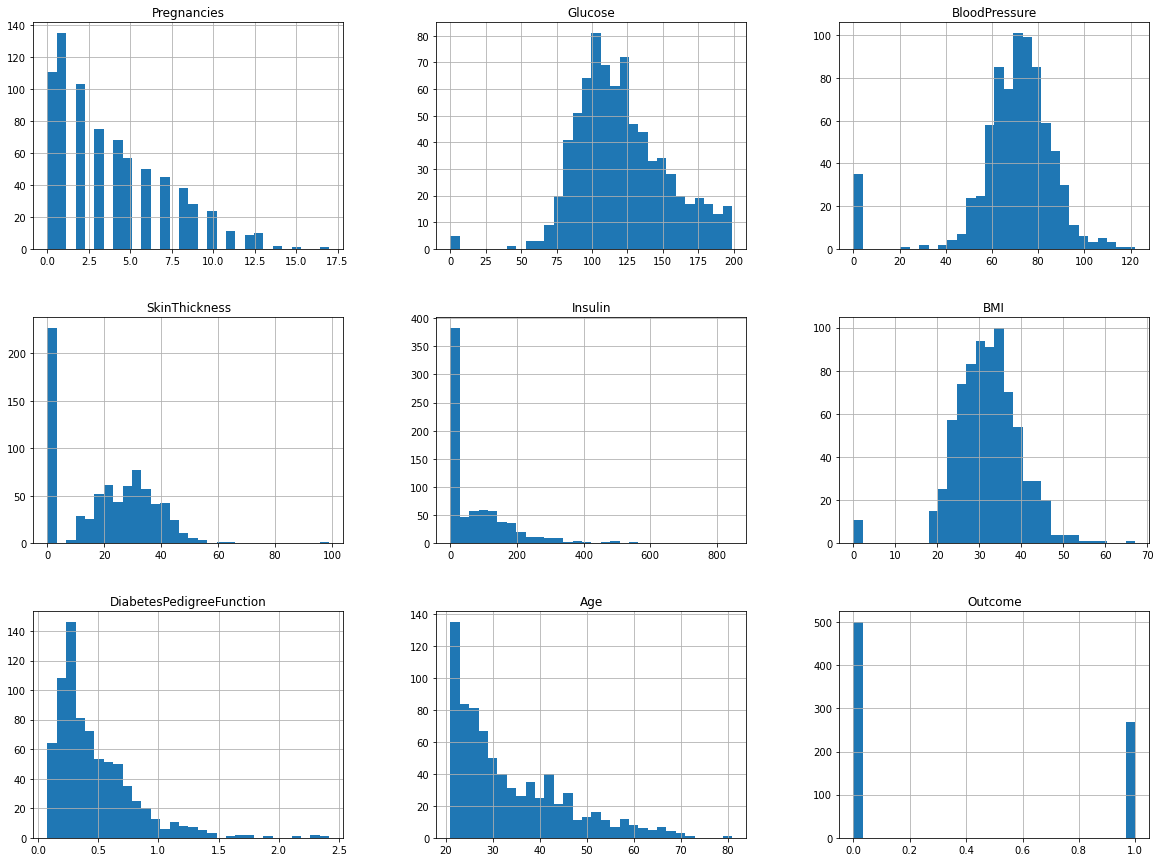

In [6]:
data_file.hist(bins=30, figsize=(20,15))
plt.show()

Notice that there are a high number of 0 values for skin thickness, blood pressure and insulin level. There are also some 0 values for glucose level and BMI. 

Column values that should never be 0 are: skin thickness, blood pressure, BMI. This means that 0 values in these columns are missing measurements for the specific patient. 

Column values such as blood glucose level and insulin level although should not be 0s in theory, there is the possibility that the values are so low that measurement tools/assays have round it to 0. They should be handled differently than the other columns. 

In [7]:
skewed_features = data_file.apply(lambda x:x.skew()).sort_values(ascending=False)
skewed_features

Insulin                     2.272251
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Pregnancies                 0.901674
Outcome                     0.635017
Glucose                     0.173754
SkinThickness               0.109372
BMI                        -0.428982
BloodPressure              -1.843608
dtype: float64

Interpret data with zeros.

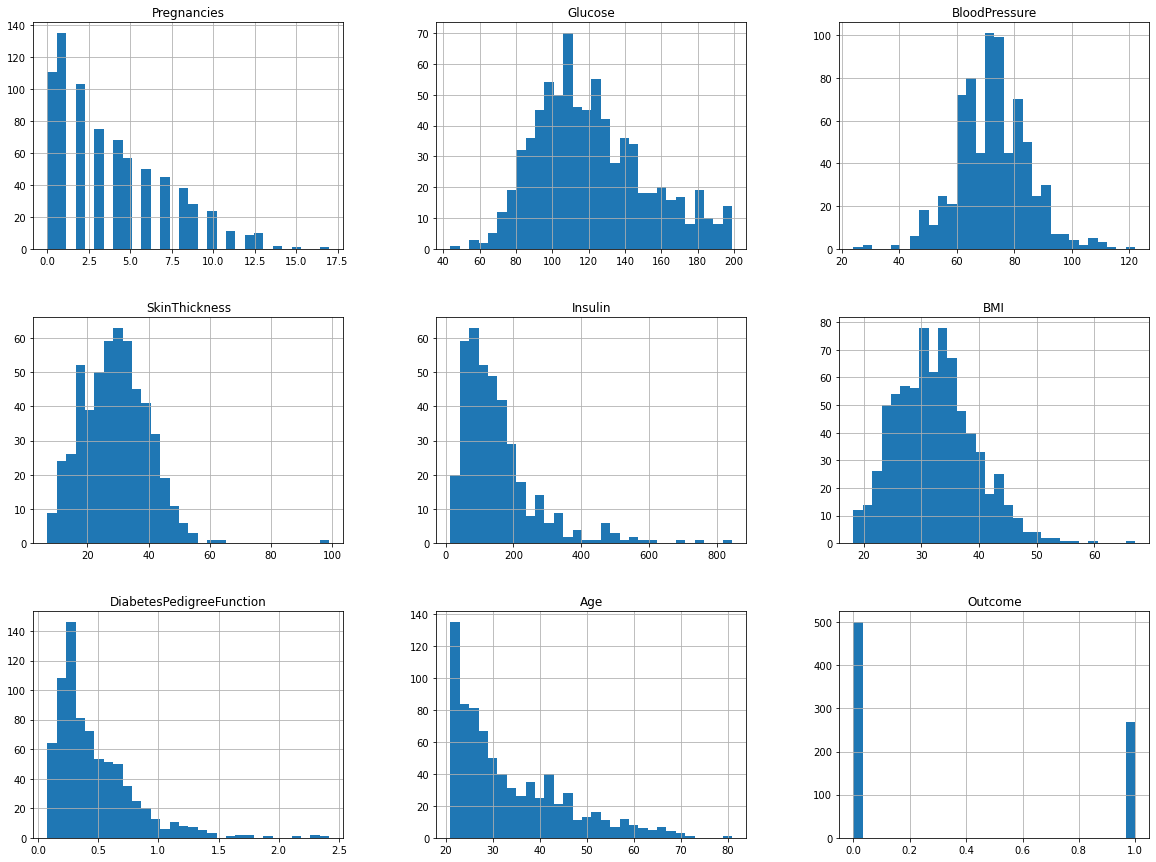

In [8]:
# replace zeros with NaN for easier work
data_file[['BMI','Insulin','SkinThickness','BloodPressure','Glucose']] = data_file[['BMI','Insulin','SkinThickness',
                                                                   'BloodPressure','Glucose']].replace(0,np.nan)
# plot data again
data_file.hist(bins=30, figsize=(20,15));

After filtering out zeros, it can be observed that most column data have a Gaussian-ish distribution and some are skewed. Skewness is calculated below and lower the score, closer the distributoon is to a symmetric Gaussian distribution. 

In [9]:
skewed_features = data_file.apply(lambda x:x.skew()).sort_values(ascending=False)
skewed_features

Insulin                     2.166464
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Pregnancies                 0.901674
SkinThickness               0.690619
Outcome                     0.635017
BMI                         0.593970
Glucose                     0.530989
BloodPressure               0.134153
dtype: float64

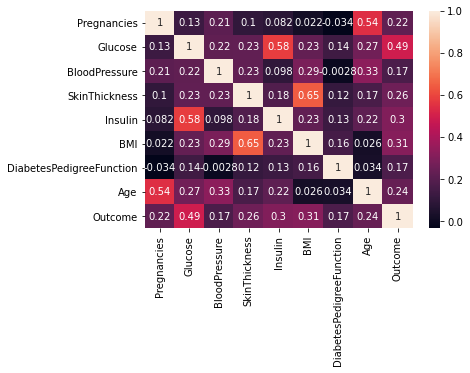

In [10]:
# check correlation of variables 
corr = data_file.corr()

#for better visualization, use a heatmap 
sns.heatmap(corr, annot=True);

From the heatmap, we can see that: 
* SkinThickness + BMI 
* Glucose + Insulin 
* Age + Pregnancy 
have a relatively higher correlation. 

For Outcome, **Glucose**, **insulin** and **BMI** have the highest correlation from all features. 

For better analysis, we can examine each feature in a bit more details and analyze their relation with 'Outcome' individually. First, we can look at the Outcome data collected.  

## Outcome 

In [11]:
data_file['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

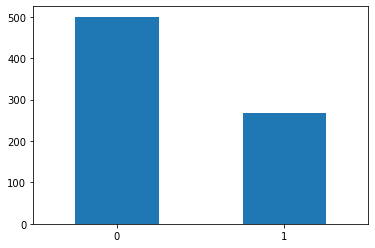

In [12]:
data_file['Outcome'].value_counts().plot.bar(rot=0)

## Pregnancy 

<AxesSubplot:>

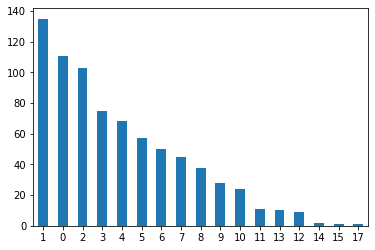

In [13]:
data_file['Pregnancies'].value_counts().plot.bar(rot=0)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

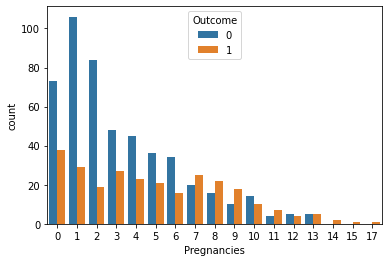

In [14]:
# See how the outcome distributes for different pregnancy frequency 
sns.countplot(x=data_file['Pregnancies'],hue=data_file['Outcome'])

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

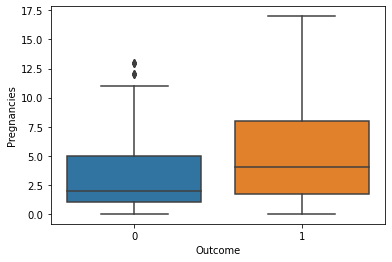

In [15]:
sns.boxplot(x=data_file['Outcome'],y=data_file['Pregnancies'])

As pregnancy times go up, the number of outcomes as diabete-positive increases. 

## Age

<AxesSubplot:xlabel='Age', ylabel='count'>

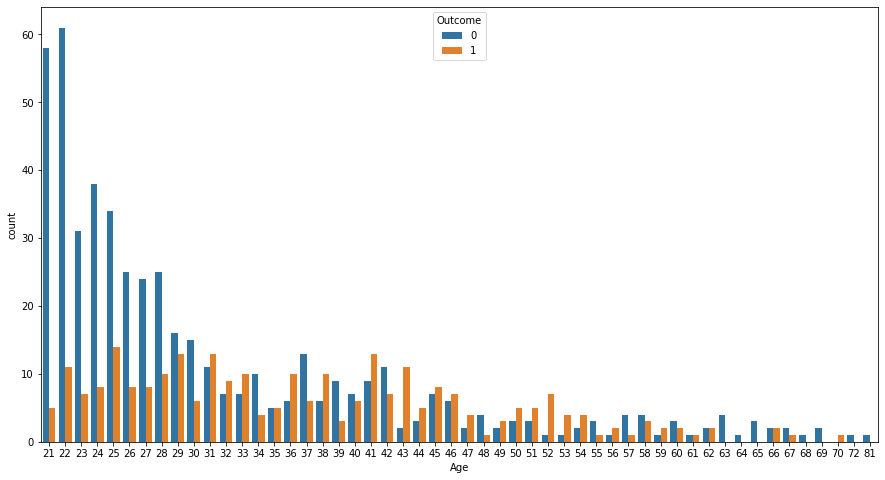

In [16]:
# See how the outcome distributes for different age
plt.figure(figsize=(15,8))
sns.countplot(x=data_file['Age'],hue=data_file['Outcome'])

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

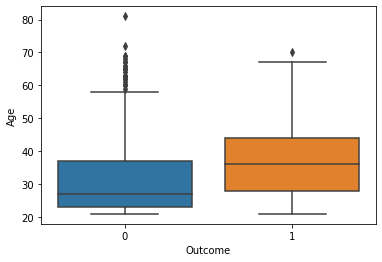

In [17]:
sns.boxplot(x=data_file['Outcome'],y=data_file['Age'])

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

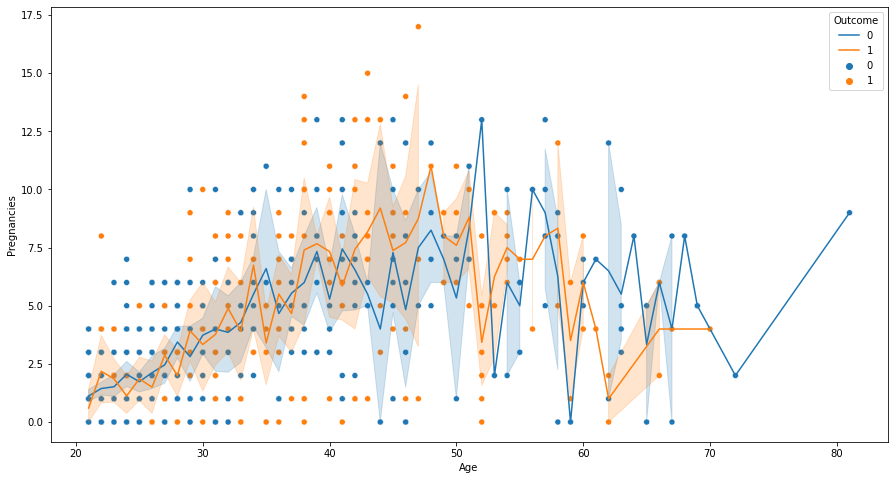

In [18]:
# since Age + Pregnancy has high correlation from the previous correlation matrix, investigate their relation. 
# See how the outcome distributes for different age
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=data_file)
sns.lineplot(x='Age',y='Pregnancies',hue='Outcome',data=data_file)

Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval. 

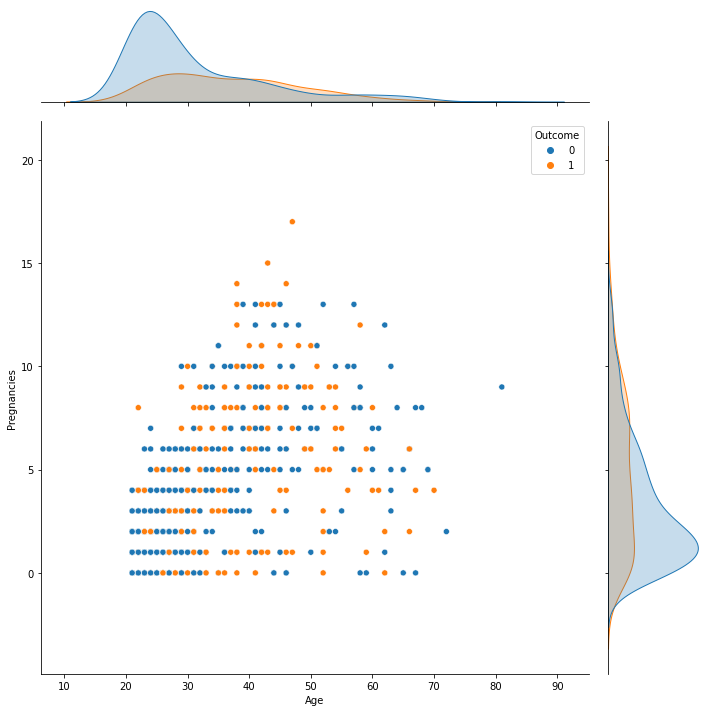

In [19]:
sns.jointplot(data=data_file, x="Age", y="Pregnancies", hue='Outcome', height=10)

Similar to pregnancies, older age is associated with higher diabete outcome patients. 

Looking at the pregnancies vs. age graph, it can be observed that before age 50, there is an upward trend between the 2 features. Both negative and positive diabetes population have this trend. 

## Glucose 

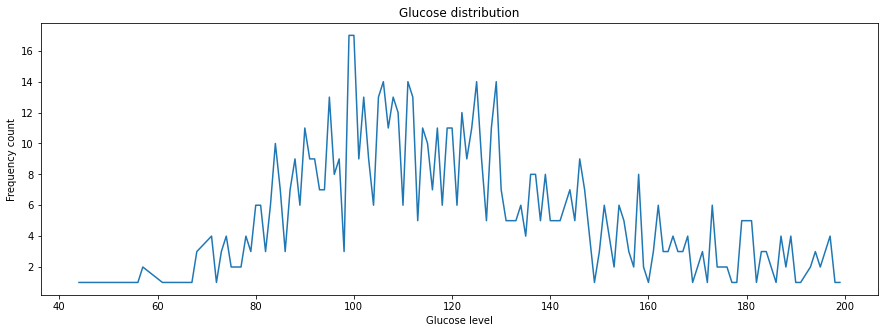

In [20]:
glucose_count = data_file['Glucose'].value_counts().sort_index(ascending=True)
plt.figure(figsize = (15,5))
plt.plot(glucose_count)
plt.xlabel("Glucose level")
plt.ylabel("Frequency count")
plt.title("Glucose distribution")
plt.show()

<AxesSubplot:xlabel='Glucose', ylabel='count'>

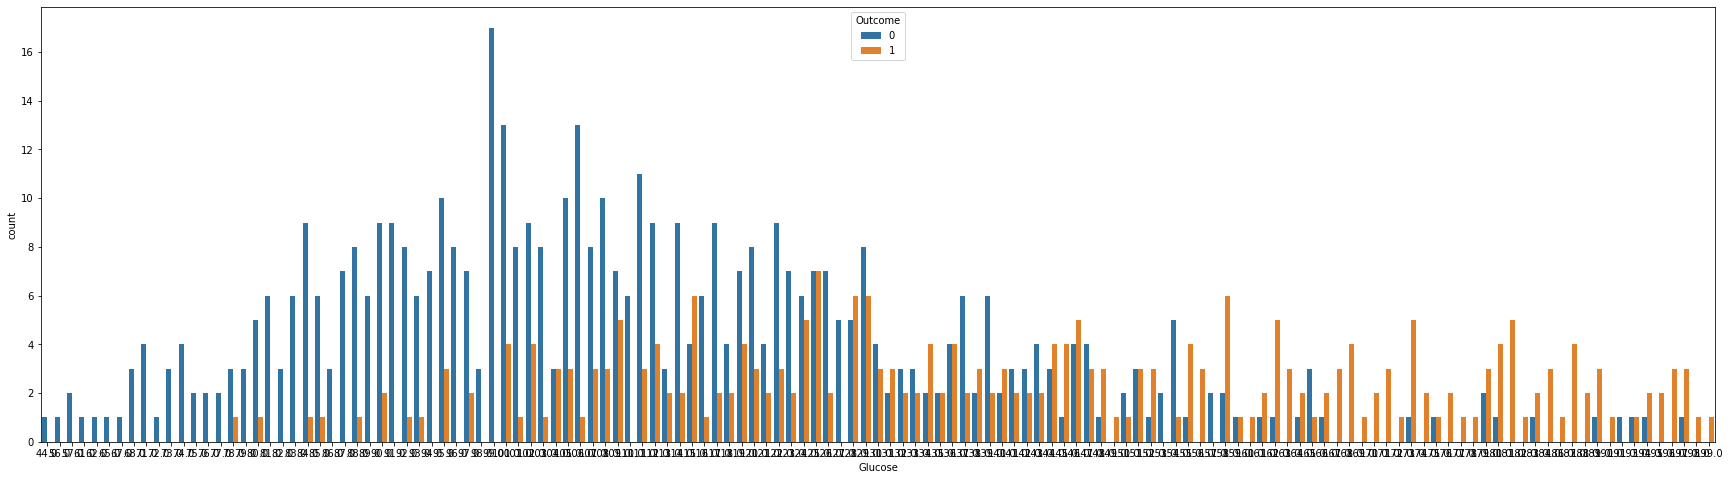

In [21]:
# See how the outcome distributes for different glucose level
plt.figure(figsize=(30,8))
sns.countplot(x=data_file['Glucose'],hue=data_file['Outcome'])

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

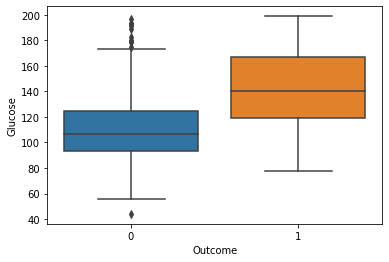

In [22]:
sns.boxplot(x=data_file['Outcome'],y=data_file['Glucose'])

Generally, high glucose level is also associated with positive diabetes outcome.

## Blood Pressure

<AxesSubplot:xlabel='BloodPressure', ylabel='count'>

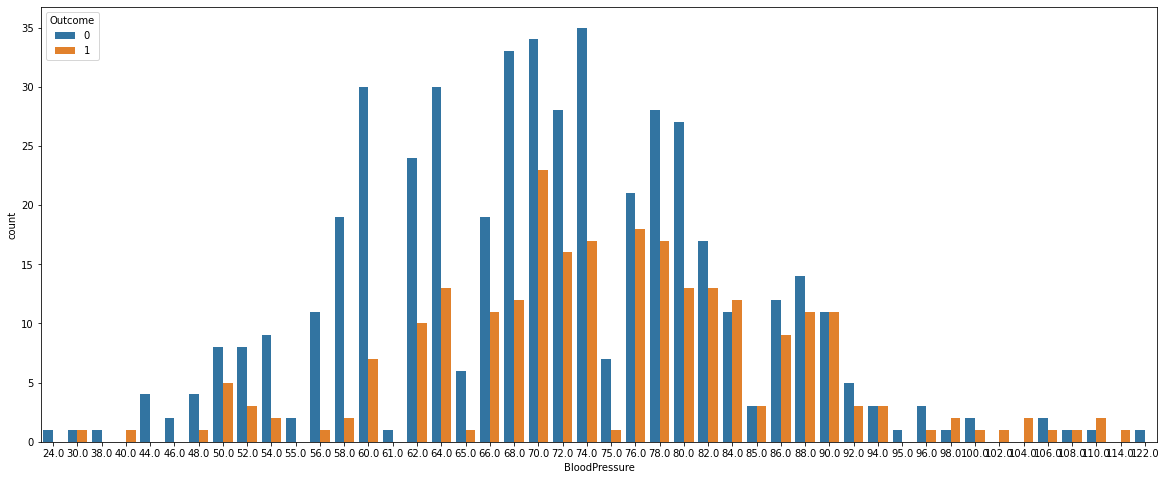

In [23]:
# See how the outcome distributes for different blood pressure levels
plt.figure(figsize=(20,8))
sns.countplot(x=data_file['BloodPressure'],hue=data_file['Outcome'])

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

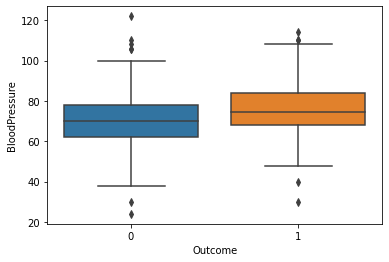

In [24]:
sns.boxplot(x=data_file['Outcome'],y=data_file['BloodPressure'])

Compared with previous features, the mean blood pressure for diabete-negative and diabete-positive samples do not differ by a lot. 

## Skin Thickness 

<AxesSubplot:xlabel='SkinThickness', ylabel='count'>

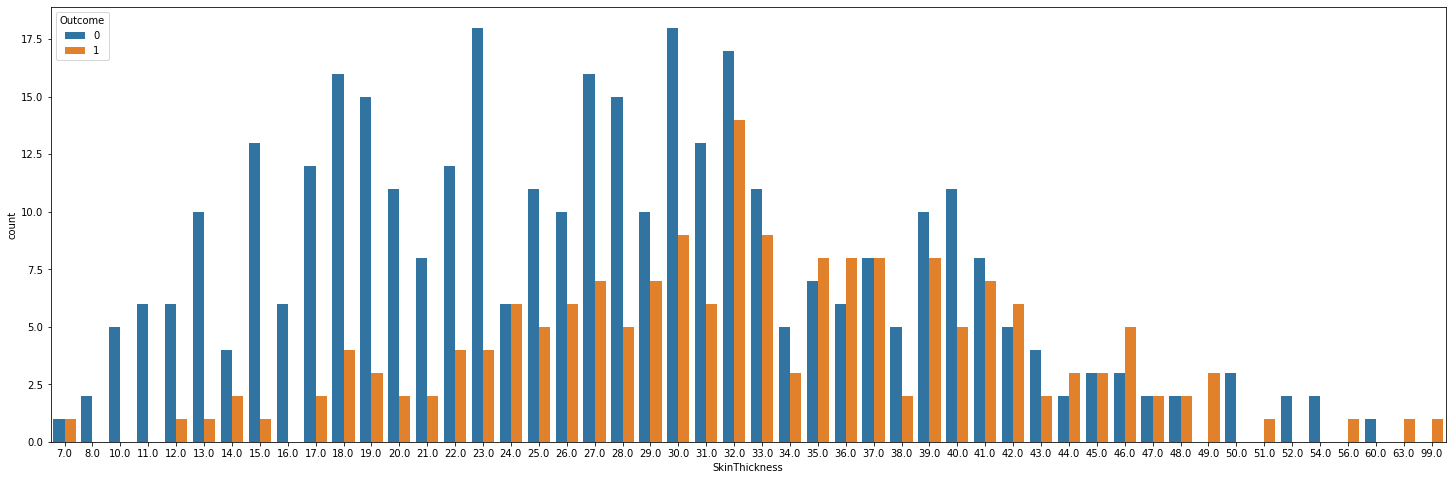

In [25]:
# See how the outcome distributes for different blood pressure levels
plt.figure(figsize=(25,8))
sns.countplot(x=data_file['SkinThickness'],hue=data_file['Outcome'])

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

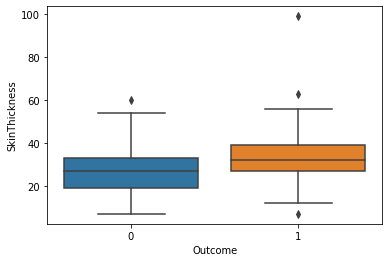

In [26]:
sns.boxplot(x=data_file['Outcome'],y=data_file['SkinThickness'])

## Insulin 

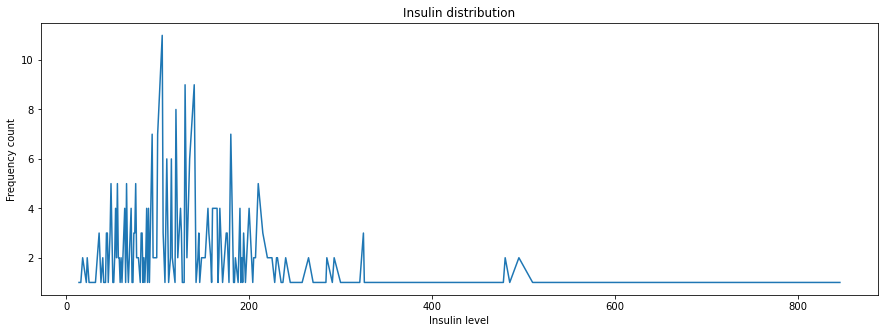

In [27]:
insulin_count = data_file['Insulin'].value_counts().sort_index(ascending=True)
plt.figure(figsize = (15,5))
plt.plot(insulin_count)
plt.xlabel("Insulin level")
plt.ylabel("Frequency count")
plt.title("Insulin distribution")
plt.show()

<AxesSubplot:xlabel='Insulin', ylabel='count'>

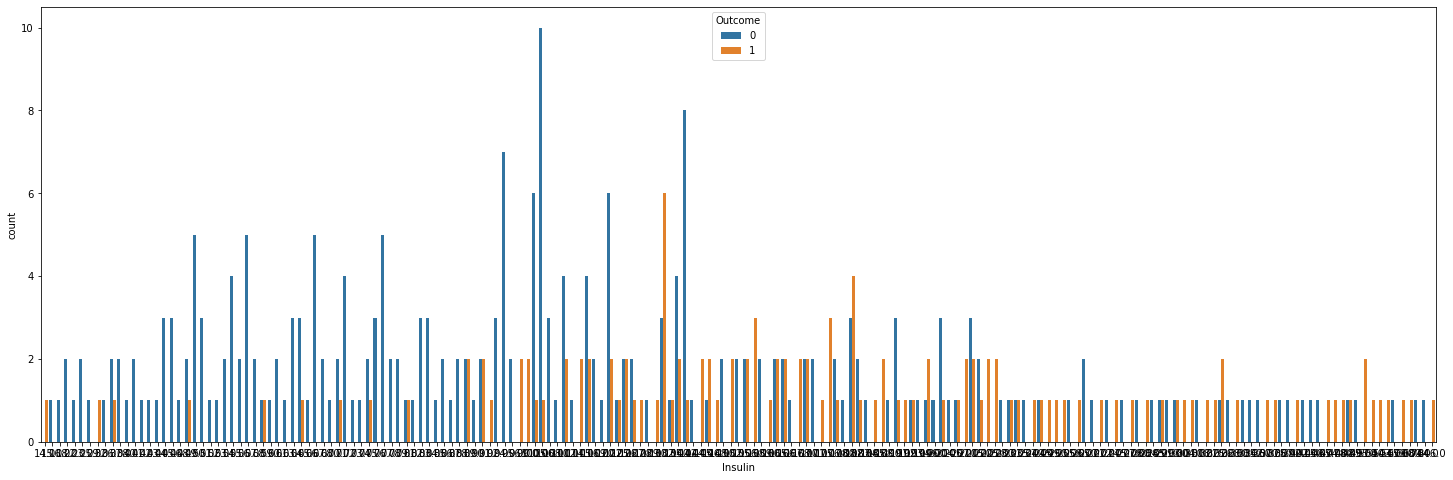

In [28]:
# See how the outcome distributes for different insulin level
plt.figure(figsize=(25,8))
sns.countplot(x=data_file['Insulin'],hue=data_file['Outcome'])

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

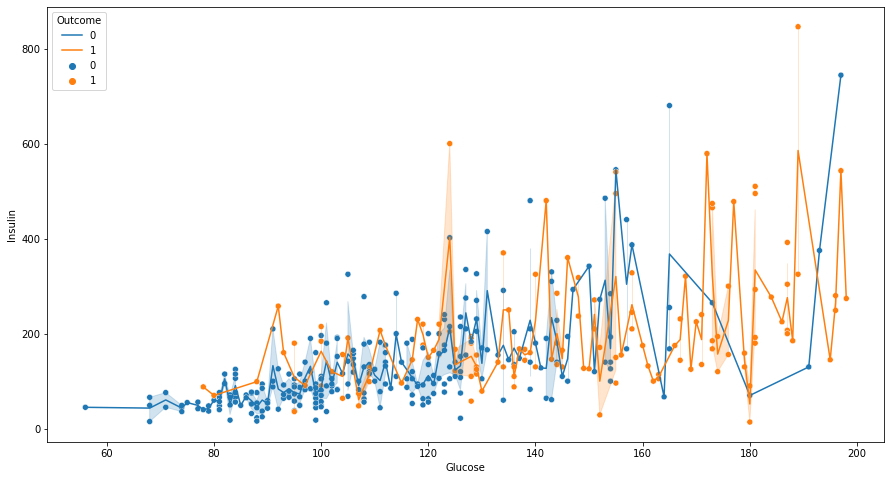

In [29]:
# since Glucose + Insulin has high correlation from the previous correlation matrix, investigate their relation. 
# See how the outcome distributes for different age
plt.figure(figsize=(15,8))
sns.scatterplot(x='Glucose',y='Insulin',hue='Outcome',data=data_file)
sns.lineplot(x='Glucose',y='Insulin',hue='Outcome',data=data_file)

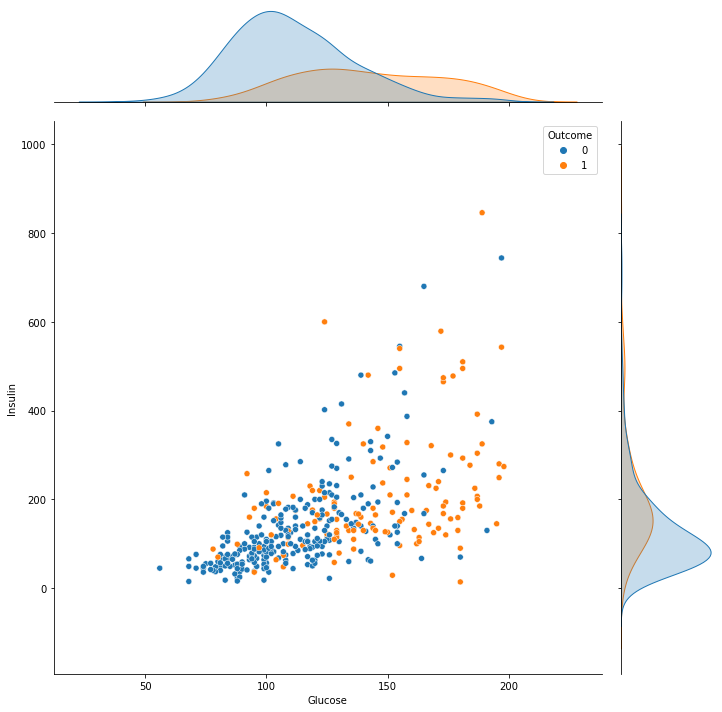

In [32]:
sns.jointplot(data=data_file, x="Glucose", y="Insulin", hue='Outcome', height=10)

Overall, the trend of both negative and positive diabetes population is that there is a positive trend between glucose level and insulin level. Also notice that when outcome is 0, there are more values in the lower end of the curve, i.e. low insulin and glucose level. For the same glucose level, there is often a higher insulin production level. 

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

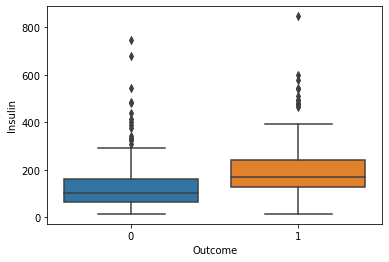

In [33]:
sns.boxplot(x=data_file['Outcome'],y=data_file['Insulin'])

There is a higher mean insulin level in outcome=1 population than outcome=0 population. 

## BMI

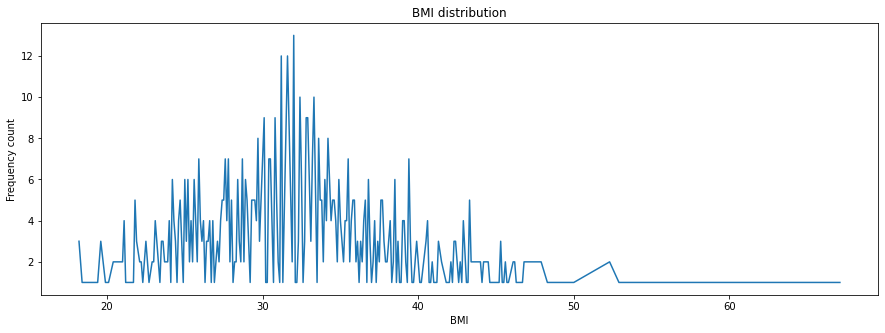

In [34]:
BMI_count = data_file['BMI'].value_counts().sort_index(ascending=True)
plt.figure(figsize = (15,5))
plt.plot(BMI_count)
plt.xlabel("BMI")
plt.ylabel("Frequency count")
plt.title("BMI distribution")
plt.show()

Highest frequency occur at BMI between 30-35.

<AxesSubplot:xlabel='BMI', ylabel='count'>

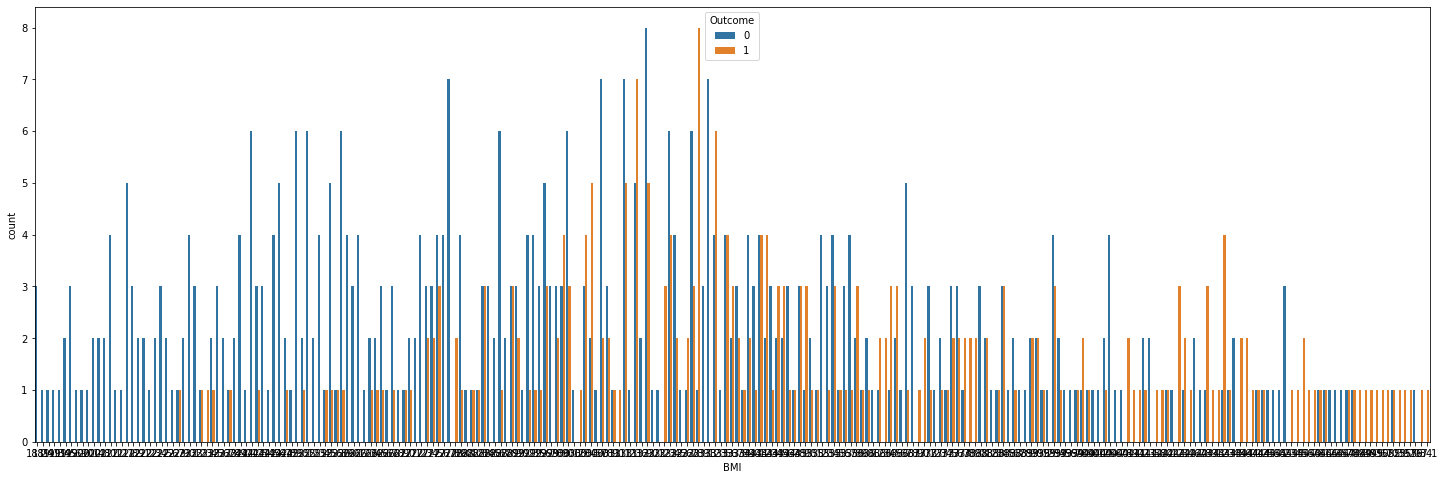

In [35]:
# See how the outcome distributes for different BMI number
plt.figure(figsize=(25,8))
sns.countplot(x=data_file['BMI'],hue=data_file['Outcome'])

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

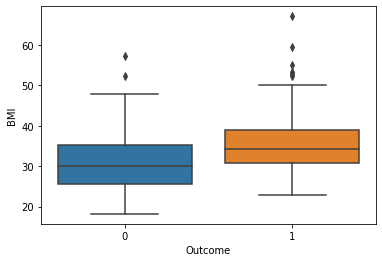

In [36]:
sns.boxplot(x=data_file['Outcome'],y=data_file['BMI'])

Generally, there are more diabetes patient in higher BMI range. 

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

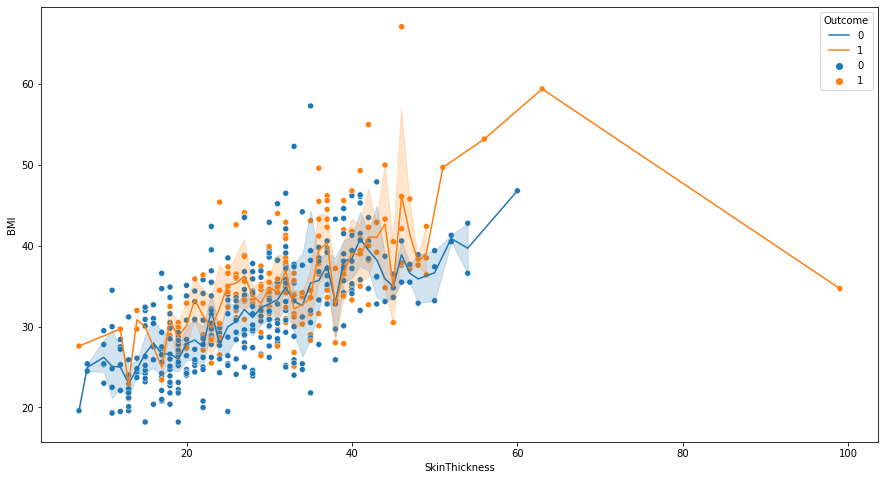

In [37]:
# since BMI + Skin Thickess has high correlation from the previous correlation matrix, investigate their relation. 
plt.figure(figsize=(15,8))
sns.scatterplot(x='SkinThickness',y='BMI',hue='Outcome',data=data_file)
sns.lineplot(x='SkinThickness',y='BMI',hue='Outcome',data=data_file)

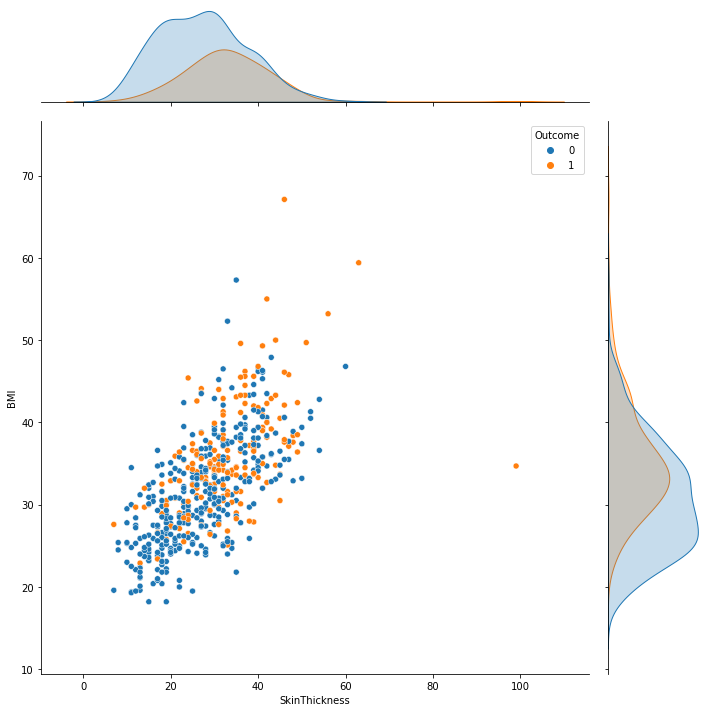

In [38]:
sns.jointplot(data=data_file, x="SkinThickness", y="BMI", hue='Outcome', height=10)

Generally higher skin thickness has higher BMI. There is one outlier when skin Thickness is the highest in the dataset. At given skin thickness, positive patients also have higher BMI. 

## Diabetes Pedigree Function

Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) 

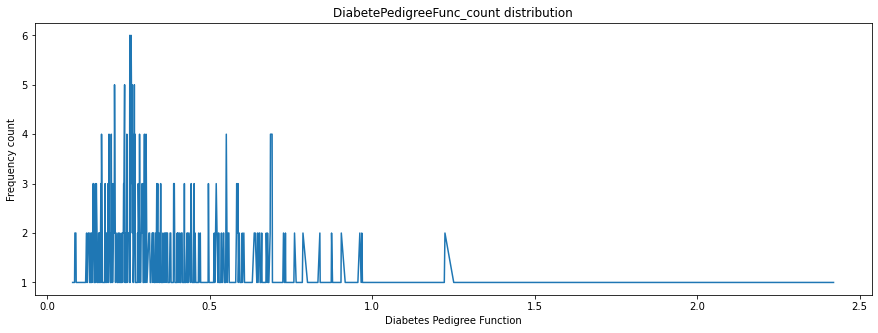

In [39]:
DiabetePedigreeFunc_count = data_file['DiabetesPedigreeFunction'].value_counts().sort_index(ascending=True)
plt.figure(figsize = (15,5))
plt.plot(DiabetePedigreeFunc_count)
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("Frequency count")
plt.title("DiabetePedigreeFunc_count distribution")
plt.show()

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='count'>

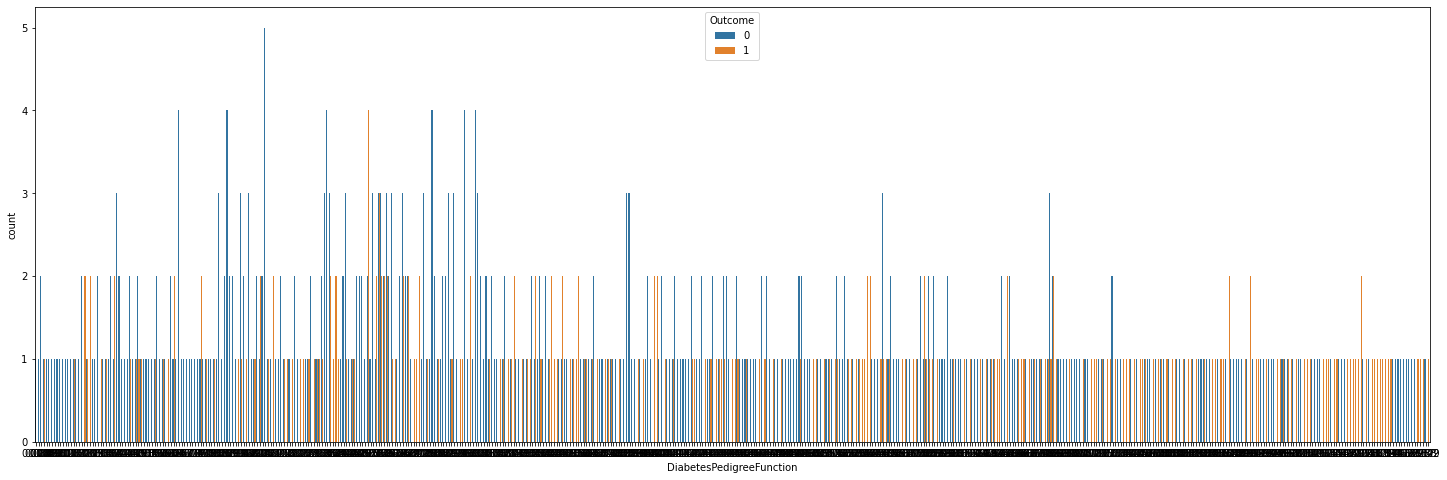

In [40]:
# See how the outcome distributes for different DiabetesPedigreeFunction number
plt.figure(figsize=(25,8))
sns.countplot(x=data_file['DiabetesPedigreeFunction'],hue=data_file['Outcome'])
## count plot really hard to see

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

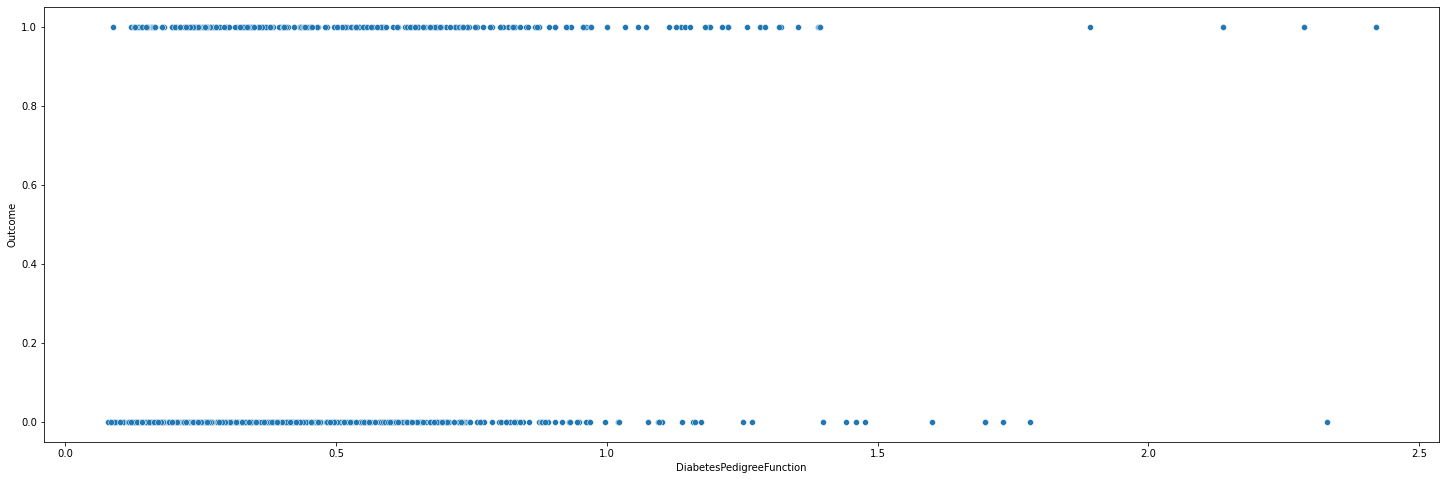

In [41]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=data_file['DiabetesPedigreeFunction'],y=data_file['Outcome'])

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

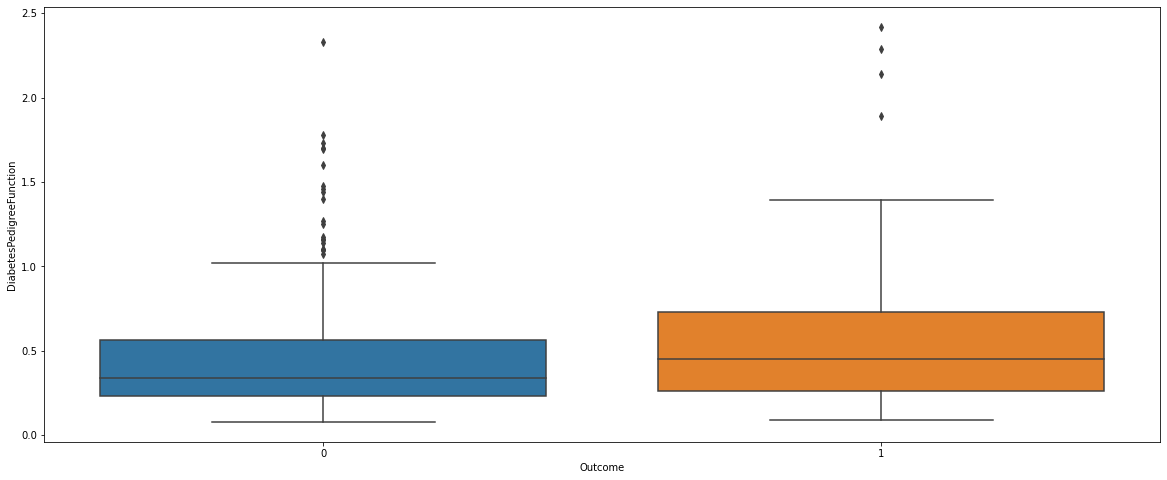

In [42]:
plt.figure(figsize=(20,8))
sns.boxplot(x=data_file['Outcome'],y=data_file['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

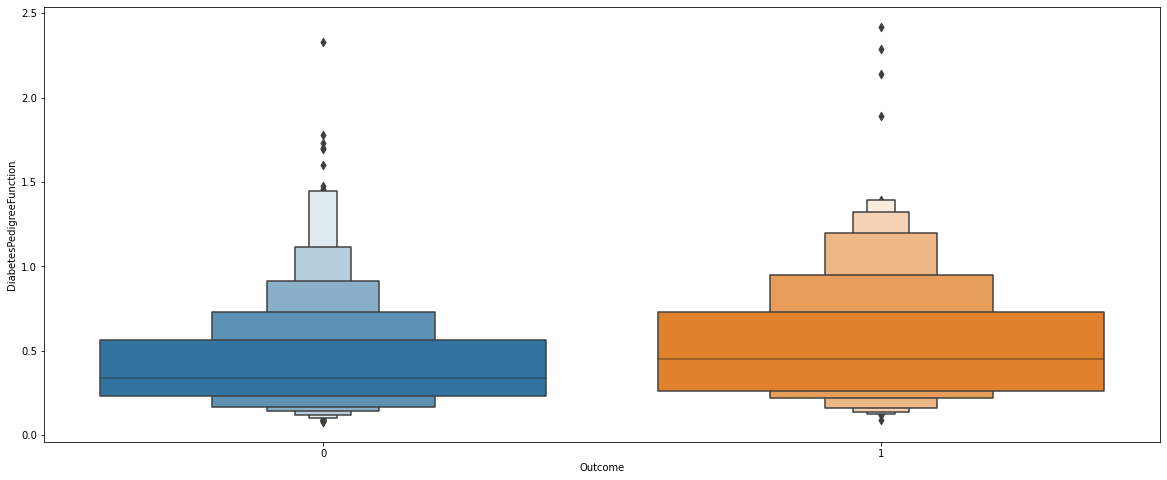

In [43]:
plt.figure(figsize=(20,8))
sns.boxenplot(x=data_file['Outcome'],y=data_file['DiabetesPedigreeFunction'])

# 2. Feature Transformations and Data Preparation

## Treating Outliers 

Here outliers will be handled like missing values. Other methods include: 
* Transforming values 
    * Scaling
    * log transformation
    * Cube Root Normalization
    * Box-trasnformation
* Separately treating based on specific case 
* or just delete them

Methods to identify outliers. Here we will select outliers base on IQR method. 
* a) Hypothesis Testing
* b) Z-score method
* c) Robust Z-score
* d) I.Q.R method
* e) Winsorization method (Percentile Capping)
* f) DBSCAN Clustering
* g) Isolation Forest
* h) Linear Regression Models (PCA, LMS)
* i) Standard Deviation
* j) Percentile
* k) Visualizing the data

<AxesSubplot:>

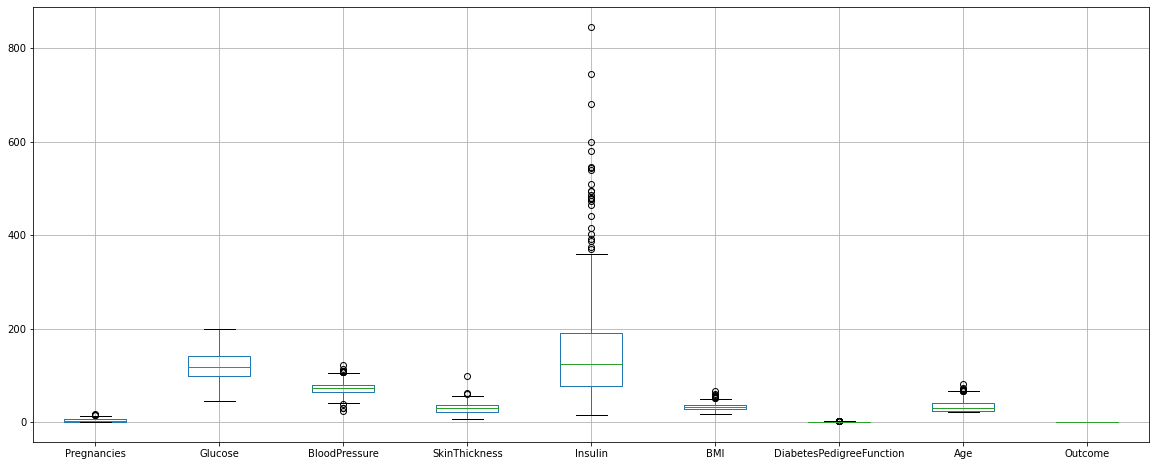

In [44]:
plt.figure(figsize=(20,8))
data_file.boxplot()

Outliers that should be handled: pregnancies, blood pressure, insulin, skin thickness, BMI, Diabetes Pedigree Function.

In [45]:
def replace_outlier_IQR_bound(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    return Q1-1.5*IQR, Q3+1.5*IQR

In [46]:
df = data_file.copy()

<AxesSubplot:ylabel='Pregnancies'>

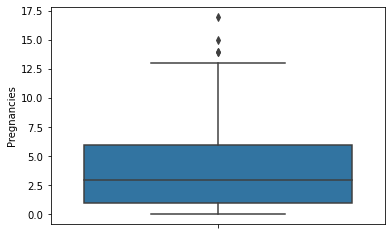

In [47]:
sns.boxplot(y=data_file['Pregnancies'])

In [66]:
def replace_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    low = Q1-1.5*IQR
    high = Q3+1.5*IQR
    
    df.loc[df <= low] = np.nan
    df.loc[df >= high] = np.nan
    
    return df

In [67]:
df_new = df.copy()

In [68]:
pd.options.mode.chained_assignment = None
df_new['Pregnancies'] = replace_outlier_IQR(df_new['Pregnancies']);

In [69]:
df_new['BloodPressure'] = replace_outlier_IQR(df_new['BloodPressure'])

In [70]:
df_new['Insulin'] = replace_outlier_IQR(df_new['Insulin'])

In [71]:
df_new['SkinThickness'] = replace_outlier_IQR(df_new['SkinThickness'])

In [72]:
df_new['BMI'] = replace_outlier_IQR(df_new['BMI'])

In [73]:
df_new['DiabetesPedigreeFunction'] = replace_outlier_IQR(df_new['DiabetesPedigreeFunction'])

<AxesSubplot:>

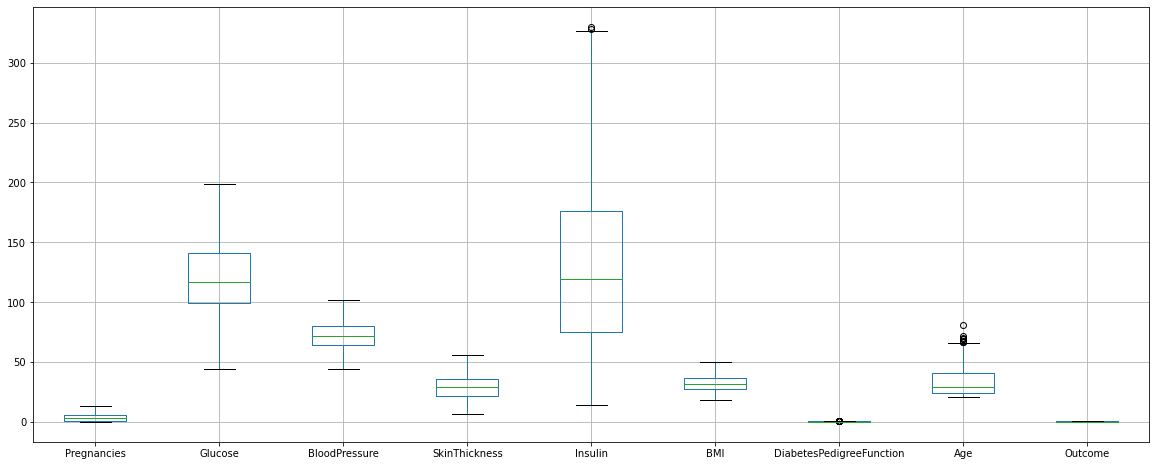

In [74]:
# for column in df:
#     if column == 'Age' or column == 'Outcome': 
#         continue
#     df_new[column] = replace_outlier_IQR(df[column])

plt.figure(figsize=(20,8))
df_new.boxplot()

## Imputation 

All test on the following imputations, combining attributes and scaling are done on a new object df_imp. The test/train data will be processed after in a pipeline after methods are decided. 

In [75]:
from sklearn.impute import KNNImputer
df_imp = df_new.copy()

imputer = KNNImputer(n_neighbors=5, weights='uniform')
x = imputer.fit_transform(df_imp)
df_imp = pd.DataFrame(x, columns=df_imp.columns)

df_imp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,146.2,33.6,0.6270,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.3510,31.0,0.0
2,8.0,183.0,64.0,29.2,164.6,23.3,0.6720,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0,0.0
4,0.0,137.0,82.0,35.0,168.0,43.1,0.3288,33.0,1.0


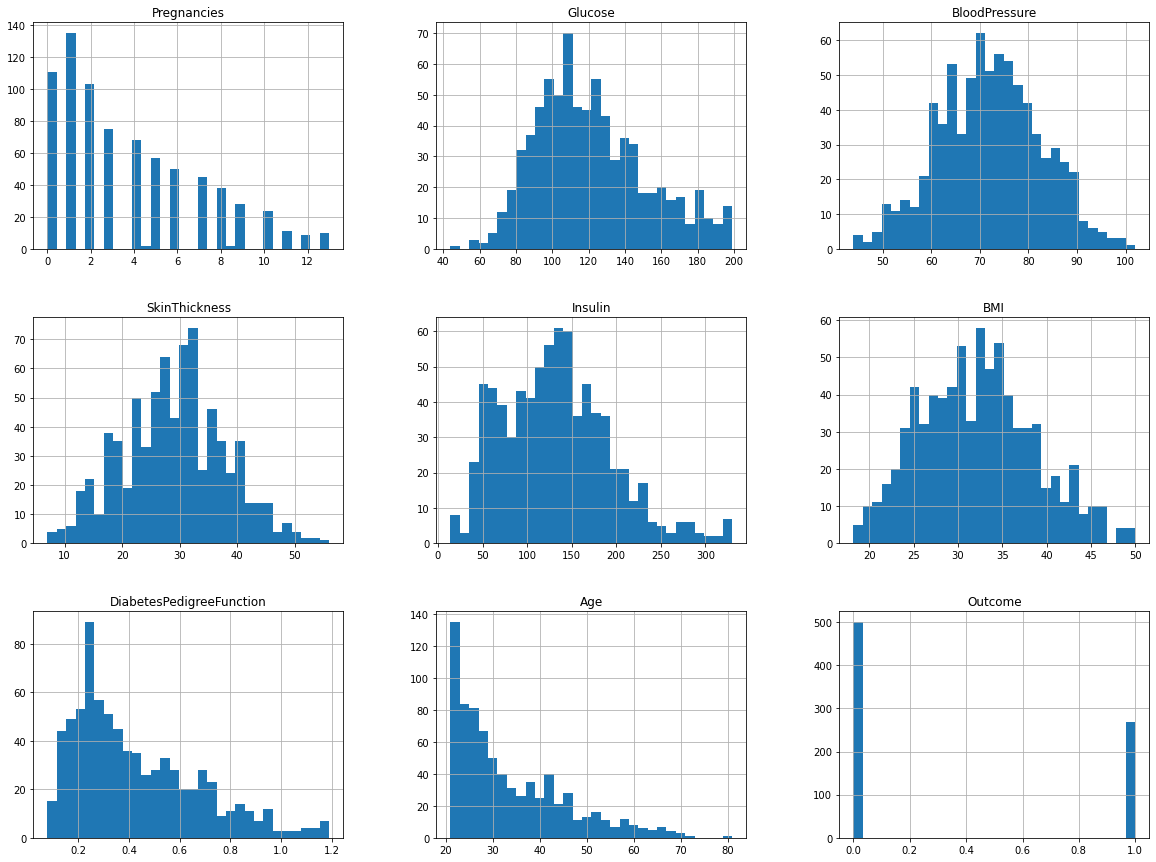

In [76]:
df_imp.hist(bins=30, figsize=(20,15))
plt.show()

In [77]:
skewed_features = df_imp.apply(lambda x:x.skew()).sort_values(ascending=False)
skewed_features

Age                         1.129597
DiabetesPedigreeFunction    0.934374
Pregnancies                 0.812678
Outcome                     0.635017
Insulin                     0.593198
Glucose                     0.534415
BMI                         0.262738
SkinThickness               0.074484
BloodPressure              -0.008532
dtype: float64

To do: 
* do log transform on skewed data such as: age, diabetes pedigree function or insulin, pregnancies. 

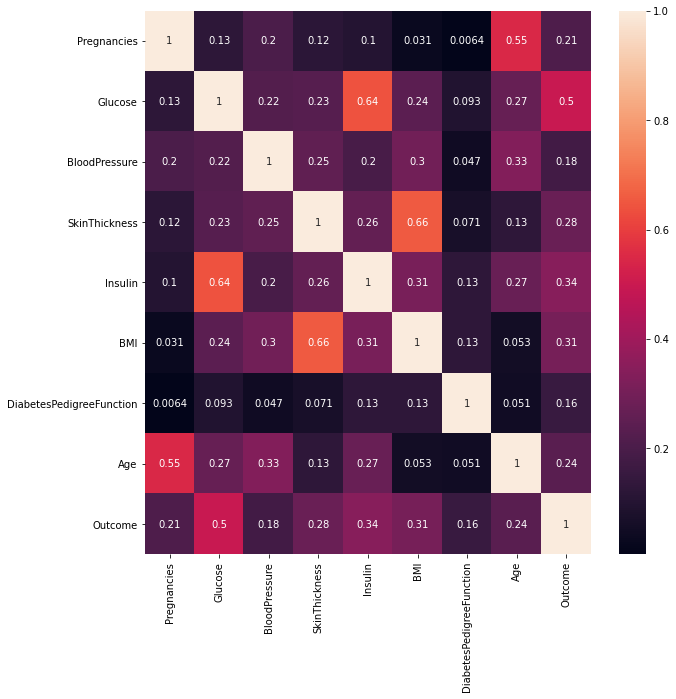

In [78]:
# check correlation of variables 
corr_knnImp = df_imp.corr()

#for better visualization, use a heatmap 
plt.figure(figsize = (10,10))
sns.heatmap(corr_knnImp, annot=True);

Generally the correlation of all features with outcome increased. 

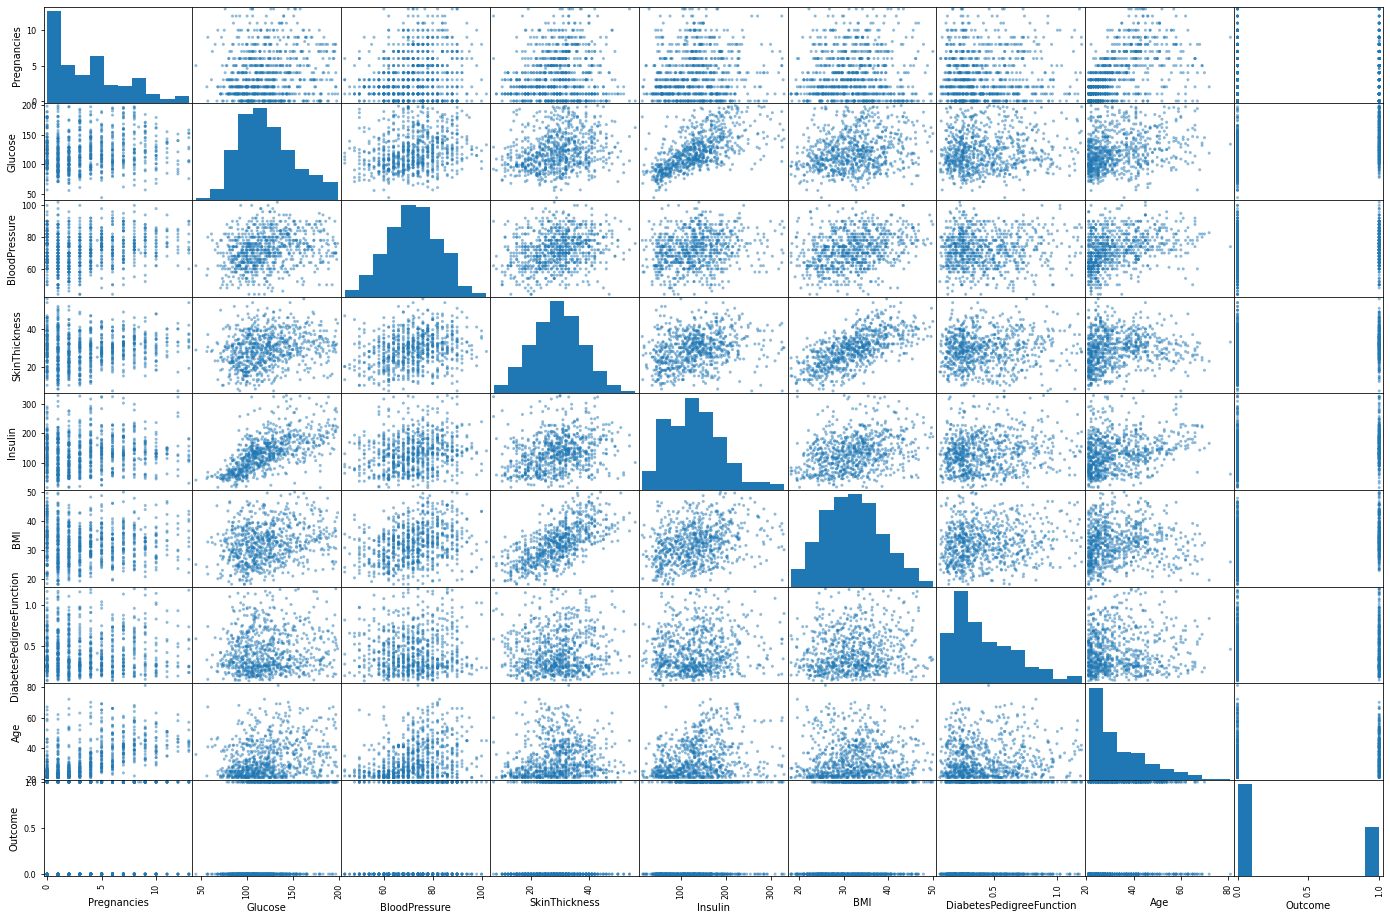

In [79]:
# Scatter matrix on imputated data 
pd.plotting.scatter_matrix(df_imp, figsize=(24,16));

In [59]:
# scatter plot on data file with NaN values
# pd.plotting.scatter_matrix(data_file, figsize=(24,16));
# From the scatter plots, it can be seen that after imputation, data clusters are clearer and shape can be more easily identified. 

## Experiment on Attribute Combinations

After investigating some relations of features, we can try to combine some features together and see if it will have a higher relation to others.

During pregnancy, your placenta makes hormones that cause glucose to build up in your blood. Usually, your pancreas can send out enough insulin to handle it. But if your body can't make enough insulin or stops using insulin as it should, your blood sugar levels rise, and you get gestational diabetes.

This means that frequency of pregnancy is probably more important than the total times of pregnancy, i.e. without sufficient time for body to adjust back to normal glucose production after each pregnancy, the pancreas will always be demanded to produce high level of glucose. New attribute, pregnancy_per_year, can be investigated. 

In [80]:
df_imp['Pregnancy_per_year'] = df_imp['Pregnancies']/df_imp['Age'] 
df_imp['Glucose_per_insulin'] = df_imp['Glucose']/df_imp['Insulin'] 
df_imp['SkinThickness_per_bmi'] = df_imp['SkinThickness']/df_imp['BMI'] 

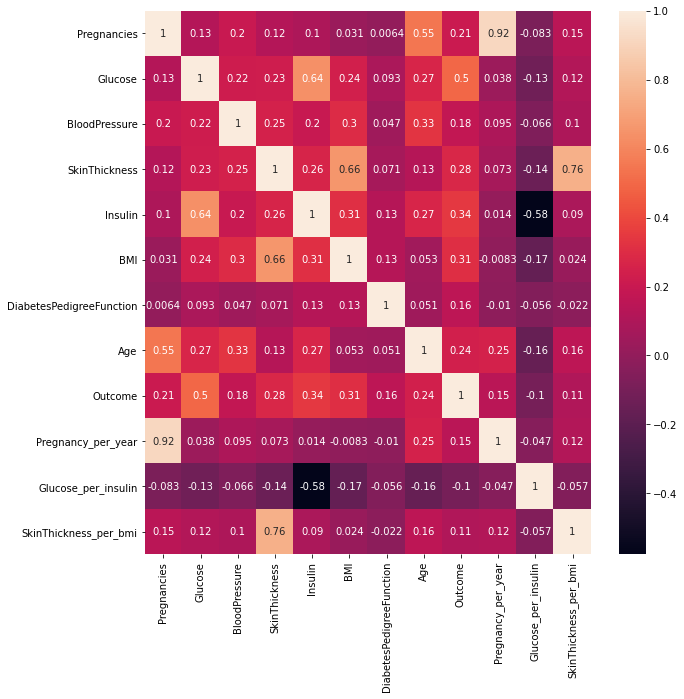

In [81]:
# check correlation of variables 
corr_knnImp = df_imp.corr()

#for better visualization, use a heatmap 
plt.figure(figsize = (10,10))
sns.heatmap(corr_knnImp, annot=True);

Correlation with outcome is not necessarily improved; this is because the pregnancy frequency, although will correlate with age (older one is, the more frequent one can get pregnant), does not reflect the interval between each pregnancies. Other experimented new features such as Glucose_per_insulin and SkinThickness_per_bmi also does not correlate with outcome well, and are deduced by rational guess. 

In [82]:
df_imp = df_imp.drop(columns=['Glucose_per_insulin','SkinThickness_per_bmi','Pregnancy_per_year'])

In [83]:
df_imp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,146.2,33.6,0.6270,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.3510,31.0,0.0
2,8.0,183.0,64.0,29.2,164.6,23.3,0.6720,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0,0.0
4,0.0,137.0,82.0,35.0,168.0,43.1,0.3288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.1710,63.0,0.0
764,2.0,122.0,70.0,27.0,165.0,36.8,0.3400,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.2450,30.0,0.0
766,1.0,126.0,60.0,35.2,134.2,30.1,0.3490,47.0,1.0


## Feature Scaling

Scale all attributes to the same scale. Scaling target values is not necessary. 

2 Ways: 
* Min-max scaling / normalization - values end up on the scale of 0-1. 
* Standarization - mean at 0, divides by std so variance = 1. Less affected by outliers than min-max. 

In [84]:
from sklearn import preprocessing

# we don't have the need to scale outcome
# min max does not change its values because: (x-min)/(max-min) is the same as original value
# min = 0 and max = 1. 

min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df_imp)
df_scaled = pd.DataFrame(df_scaled, columns=df_imp.columns)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.670968,0.482759,0.571429,0.418354,0.484277,0.493261,0.483333,1.0
1,0.076923,0.264516,0.379310,0.448980,0.141139,0.264151,0.245283,0.166667,0.0
2,0.615385,0.896774,0.344828,0.453061,0.476582,0.160377,0.533693,0.183333,1.0
3,0.076923,0.290323,0.379310,0.326531,0.253165,0.311321,0.079964,0.000000,0.0
4,0.000000,0.600000,0.655172,0.571429,0.487342,0.783019,0.225337,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.769231,0.367742,0.551724,0.836735,0.525316,0.462264,0.083558,0.700000,0.0
764,0.153846,0.503226,0.448276,0.408163,0.477848,0.584906,0.235400,0.100000,0.0
765,0.384615,0.496774,0.482759,0.326531,0.310127,0.251572,0.150045,0.150000,0.0
766,0.076923,0.529032,0.275862,0.575510,0.380380,0.374214,0.243486,0.433333,1.0


## Experiment on Feature Extraction
* The values such as Glucose, Insulin and BMI correlates highly with the outcome. Numerical values are hard to categorize into diabetes risk, so we can transform them into categories of risk level. 


### Glucose 

Glucose is measured by oral glucose tolerance test in this dataset. There is an explanation of diagnosis using this measurement. 
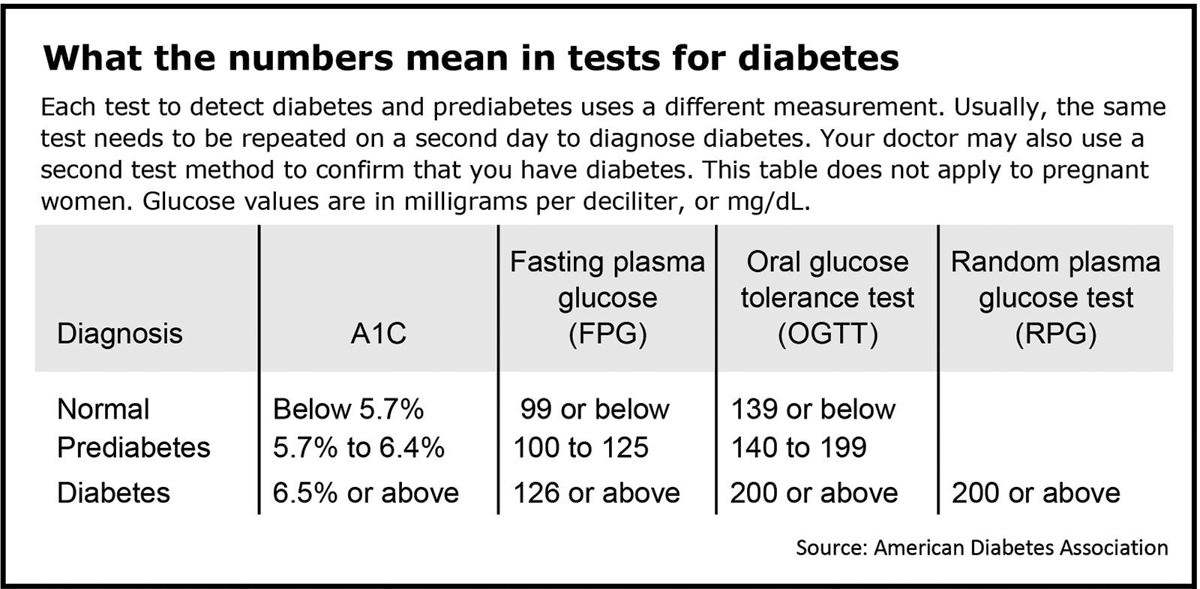
https://www.phillytrib.com/lifestyle/health/testing-for-diabetes-dont-diagnose-yourself/article_6548df99-fb51-54a2-b78f-9c9e23b99ad7.html 

Normal         0.736979
Prediabetes    0.256510
Diabetes       0.006510
Name: GlucoseDiagnosis, dtype: float64

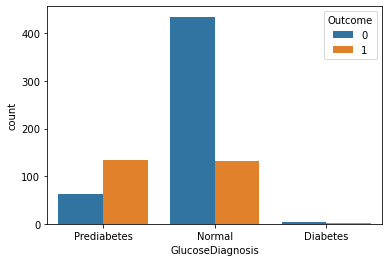

In [85]:
df_new["GlucoseDiagnosis"] = df_new["Glucose"].apply(lambda x: "Normal" if x < 140 else ("Prediabetes" if 140 <= x <= 200 else "Diabetes"))

sns.countplot(x = 'GlucoseDiagnosis', hue='Outcome', data=df_new)
df_new['GlucoseDiagnosis'].value_counts()/(df_new['GlucoseDiagnosis'].shape[0])

## Insulin
There is no clear level of insulin correspondence with diagnosis of diabetes. Will ignore the categorization for now. 

## BMI 

There are multiple ways of categorizing BMI values. An example is shown below. 
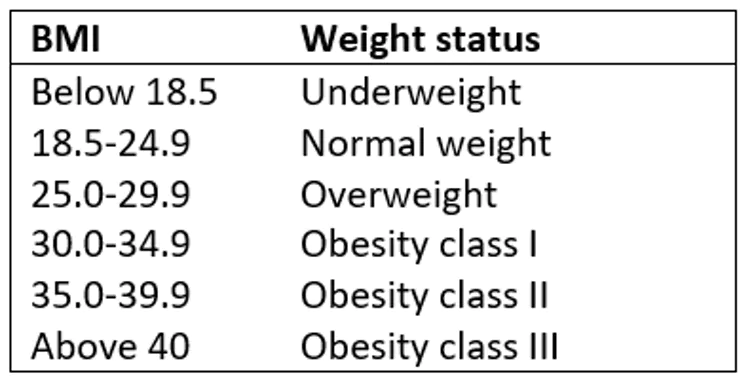
https://theconversation.com/body-mass-index-may-not-be-the-best-indicator-of-our-health-how-can-we-improve-it-143155

In [86]:
BMI_labels = ["underweight", "normal_weight", "overweight", "obesity_class_1", "obesity_class_2", "obesity_class_3"]
df_new['BMICategories'] = pd.cut(df_new['BMI'], [-1, 18.5, 25, 30, 35, 40, df['BMI'].max()], 
                       labels=BMI_labels)


obesity_class_1    0.287760
overweight         0.234375
obesity_class_2    0.192708
normal_weight      0.140625
obesity_class_3    0.114583
underweight        0.005208
Name: BMICategories, dtype: float64

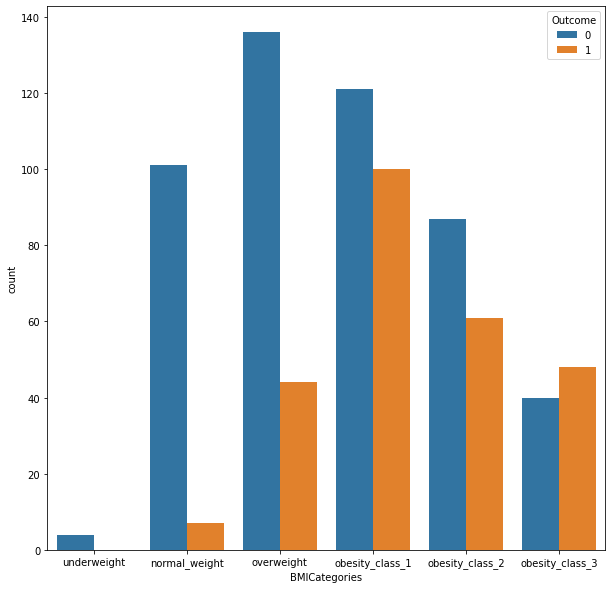

In [87]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'BMICategories', hue='Outcome', data=df_new)

df_new['BMICategories'].value_counts()/(df_new['BMICategories'].shape[0])

In [88]:
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlucoseDiagnosis,BMICategories
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Prediabetes,obesity_class_1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Normal,overweight
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Prediabetes,normal_weight
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Normal,overweight
4,0.0,137.0,NaN,35.0,168.0,43.1,NaN,33,1,Normal,obesity_class_3


## Encoding of Categorical Features  
Since the categories are ordered by severeness, it is fine to use the ordinal encoder (assign number from 1 to N for N categories). Or, to avoid the problem where 2 distant values are more similar than 2 nearby values, we can use one hot encoders. 

In [89]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df_new.columns if 10 >= df_new[col].nunique() > 2]
df_onehot = one_hot_encoder(df_new, ohe_cols, drop_first=True)
df_onehot.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlucoseDiagnosis_Normal,GlucoseDiagnosis_Prediabetes,BMICategories_normal_weight,BMICategories_overweight,BMICategories_obesity_class_1,BMICategories_obesity_class_2,BMICategories_obesity_class_3
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1,0,1,0,0,1,0,0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0,1,0,0,1,0,0,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1,0,1,1,0,0,0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,0,0,1,0,0,0
4,0.0,137.0,NaN,35.0,168.0,43.1,NaN,33,1,1,0,0,0,0,0,1


## Test Set Creation

In [90]:
from sklearn.model_selection import train_test_split 

train_set, test_set = train_test_split(df_onehot, test_size=0.25, random_state=100)

In [91]:
test_set['Outcome'].value_counts()

0    127
1     65
Name: Outcome, dtype: int64

In [92]:
train_set['Outcome'].value_counts()

0    373
1    203
Name: Outcome, dtype: int64

In [93]:
train_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlucoseDiagnosis_Normal,GlucoseDiagnosis_Prediabetes,BMICategories_normal_weight,BMICategories_overweight,BMICategories_obesity_class_1,BMICategories_obesity_class_2,BMICategories_obesity_class_3
579,2.0,197.0,70.0,NaN,NaN,34.7,0.575,62,1,0,1,0,0,1,0,0
46,1.0,146.0,56.0,NaN,NaN,29.7,0.564,29,0,0,1,0,1,0,0,0
508,2.0,84.0,50.0,23.0,76.0,30.4,0.968,21,0,1,0,0,0,1,0,0
384,1.0,125.0,70.0,24.0,110.0,24.3,0.221,25,0,1,0,1,0,0,0,0
163,2.0,100.0,64.0,23.0,NaN,29.7,0.368,21,0,1,0,0,1,0,0,0


In [94]:
train_set.shape

(576, 16)

## Transformation Pipeline 
* In this dataset there are only numerical values. If there are categorical values presented, encoder such as onehot encoder may be used ColumnTransformer may be used to combine numerical and categorical value pipelines. 

In [95]:
from sklearn.pipeline import Pipeline 
from sklearn import preprocessing
from sklearn.impute import KNNImputer

num_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5, weights='uniform')), 
    ('norm_scaler', preprocessing.StandardScaler()),
])

In [96]:
df_num = df_new.drop(['GlucoseDiagnosis', 'BMICategories', 'Outcome'], axis=1)
num_attribs = list(df_num)
cat_attribs = ['GlucoseDiagnosis', 'BMICategories']

In [97]:
from sklearn.compose import ColumnTransformer 
from sklearn import preprocessing

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs), 
    #('cat', preprocessing.LabelEncoder(), cat_attribs),
])

In [98]:
y_train = train_set.Outcome 
x_train = train_set.drop('Outcome', axis=1) 

In [99]:
y_test = test_set.Outcome 
x_test = test_set.drop('Outcome', axis=1) 

In [100]:
x_train_tr = num_pipeline.fit_transform(x_train)
x_test_tr = num_pipeline.fit_transform(x_test)

In [107]:
y_train.shape

(576,)

## Other: Try PCA (Dimensionality Reduction)

In [121]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_train_tr)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
OutcomeDf = pd.DataFrame(data = y_train.to_numpy(), columns=['Outcome'])

In [122]:
finalDf = pd.concat([principalDf, OutcomeDf['Outcome']], axis = 1)

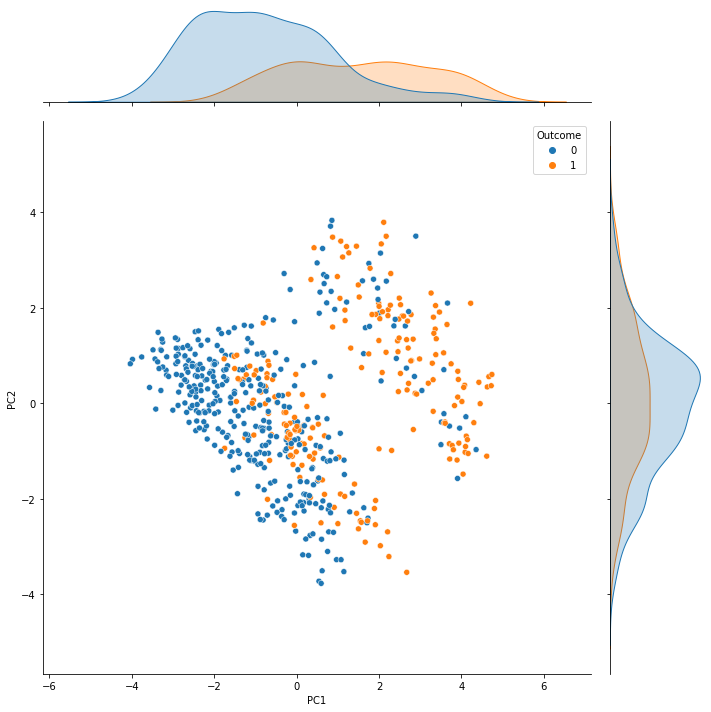

In [123]:
sns.jointplot(data=finalDf, x="PC1", y="PC2", hue='Outcome', height=10)

In [128]:
## Repeat for 3D PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_train_tr)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'])

finalDf = pd.concat([principalDf, OutcomeDf['Outcome']], axis = 1)

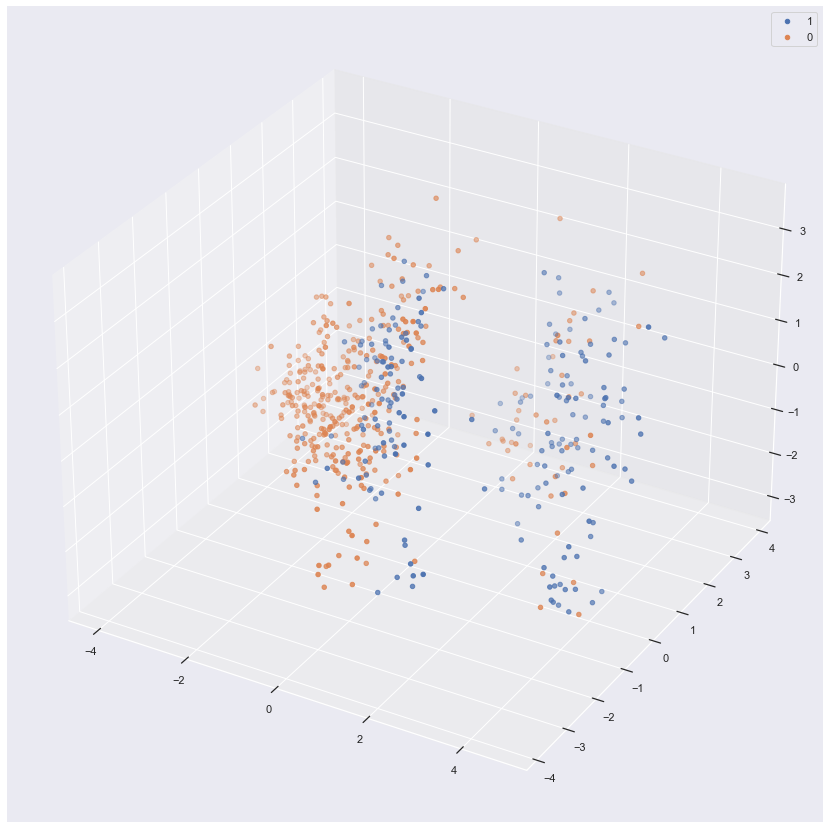

In [141]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')

for s in finalDf.Outcome.unique():
    ax.scatter(finalDf.PC1[finalDf.Outcome==s],finalDf.PC2[finalDf.Outcome==s],finalDf.PC3[finalDf.Outcome==s],label=s)

ax.legend()

Other things to try about featyre selection: 
* Remove highly correlated features 
* Run different algo to identify combination of features (ex. recursive feature elimination, and SelectionFromModel to check which gives the best accuracy and rank the importance of featues) 

# Model Training 

In [145]:
def draw_confusion_matrix(y_test,y_pred):
    fig = plt.figure(figsize=(4, 4))
    ax= plt.subplot()
    cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('Actual label')
    plt.show()

In [146]:
model_scores = []

# Logistic Regression 

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       127
           1       0.59      0.52      0.55        65

    accuracy                           0.71       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.71      0.71      0.71       192

F1 score : 0.671


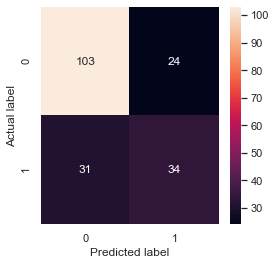

In [147]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train_tr, y_train)

y_pred = logreg.predict(x_test_tr)

print(classification_report(y_true=y_test,y_pred=y_pred))
print("F1 score : {:.3f}".format(f1_score(y_true=y_test,y_pred=y_pred,average='macro')))
draw_confusion_matrix(y_test,y_pred)
model_scores.append(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

## DecisionTree Classifier

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       127
           1       0.47      0.38      0.42        65

    accuracy                           0.65       192
   macro avg       0.59      0.58      0.58       192
weighted avg       0.63      0.65      0.64       192

F1 score : 0.584


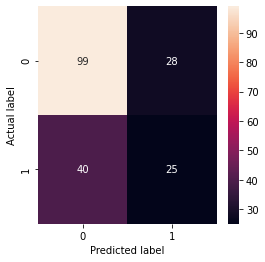

In [85]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=4)
decision_tree.fit(x_train_tr,y_train)

y_pred = decision_tree.predict(x_test_tr)
print(classification_report(y_true=y_test,y_pred=y_pred))
print("F1 score : {:.3f}".format(f1_score(y_true=y_test,y_pred=y_pred,average='macro')))
draw_confusion_matrix(y_test,y_pred)

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2} 0.6718299141575461
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       127
           1       0.46      0.35      0.40        65

    accuracy                           0.64       192
   macro avg       0.58      0.57      0.57       192
weighted avg       0.62      0.64      0.63       192

F1 score : 0.572


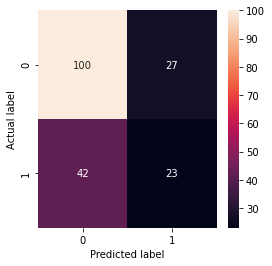

In [86]:
## Testing out different hyperparameters 
from sklearn.model_selection import GridSearchCV

param_test = {
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' :[2,3,4,5]
}

tree_cv = GridSearchCV(estimator= DecisionTreeClassifier(),
                             param_grid = param_test,scoring='f1',
                             n_jobs=-1,cv=5)

tree_cv.fit(x_train_tr,y_train)
## This best score is the mean of five cross validation folds with the best hyperparamters. 

print(tree_cv.best_params_, tree_cv.best_score_)

y_pred = tree_cv.predict(x_test_tr)
print(classification_report(y_true=y_test,y_pred=y_pred))
print("F1 score : {:.3f}".format(f1_score(y_true=y_test,y_pred=y_pred,average='macro')))

draw_confusion_matrix(y_test,y_pred)
model_scores.append(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

## Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       127
           1       0.59      0.49      0.54        65

    accuracy                           0.71       192
   macro avg       0.68      0.66      0.67       192
weighted avg       0.70      0.71      0.71       192

F1 score : 0.665


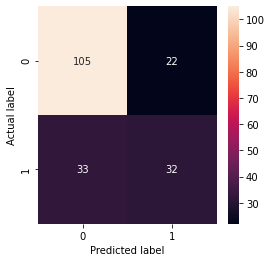

In [88]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=500,max_depth=4).fit(x_train_tr,y_train)
y_pred = random_forest.predict(x_test_tr)

print(classification_report(y_true=y_test,y_pred=y_pred))
print("F1 score : {:.3f}".format(f1_score(y_true=y_test,y_pred=y_pred,average='macro')))
draw_confusion_matrix(y_test,y_pred)

{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 3} 0.6724254546889179
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       127
           1       0.59      0.49      0.54        65

    accuracy                           0.71       192
   macro avg       0.68      0.66      0.67       192
weighted avg       0.70      0.71      0.71       192

F1 score : 0.665


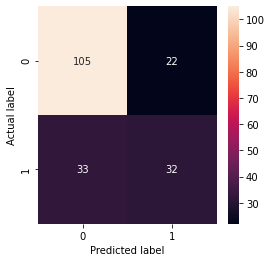

In [89]:
## Hyper-parameter tuning

rf_cv = GridSearchCV(estimator= RandomForestClassifier(n_estimators=500),
                             param_grid = param_test, scoring='f1',
                             n_jobs=-1,cv=5)
rf_cv.fit(x_train_tr, y_train)

## This best score is the mean of five cross validation folds with the best hyperparamters. 
print(rf_cv.best_params_, rf_cv.best_score_)
y_pred = rf_cv.predict(x_test_tr)

print(classification_report(y_true=y_test,y_pred=y_pred))
print("F1 score : {:.3f}".format(f1_score(y_true=y_test,y_pred=y_pred,average='macro')))
draw_confusion_matrix(y_test,y_pred)
model_scores.append(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

## Ada Boost Classifier 

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       127
           1       0.62      0.57      0.59        65

    accuracy                           0.73       192
   macro avg       0.70      0.69      0.70       192
weighted avg       0.73      0.73      0.73       192

F1 score : 0.698


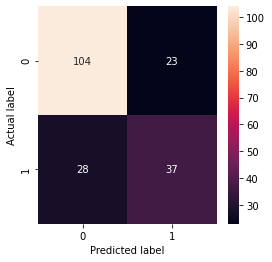

In [90]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=1000,learning_rate=0.05)
ada.fit(x_train_tr, y_train)

y_pred = ada.predict(x_test_tr)

print(classification_report(y_true=y_test,y_pred=y_pred))
print("F1 score : {:.3f}".format(f1_score(y_true=y_test,y_pred=y_pred,average='macro')))
draw_confusion_matrix(y_test,y_pred)
model_scores.append(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

In [ ]:
## Cat Boost Classifier

In [142]:
# from catboost import CatBoostClassifier

# cat = CatBoostClassifier(max_depth=3,n_estimators=1000,verbose=False)
# cat.fit(x_train_tr, y_train)

# y_pred = cat.predict(x_test_tr)

# print(classification_report(y_true=y_test,y_pred=y_pred))
# print("F1 score : {:.3f}".format(f1_score(y_true=y_test,y_pred=y_pred,average='macro')))
# draw_confusion_matrix(y_test,y_pred)
# model_scores.append(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

In [92]:
model_scores

[0.6710587795533127,
 0.5717472118959108,
 0.6651339781195497,
 0.6975444015444014,
 0.6484848484848484]